# Titanic Data Competiton

# Getting Started

## Import Libraries

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


labelencoder = LabelEncoder()
%matplotlib inline

from sklearn.datasets import load_boston
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## Going through the Data

In [152]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning

The first part is to identify what segments of data are missing.

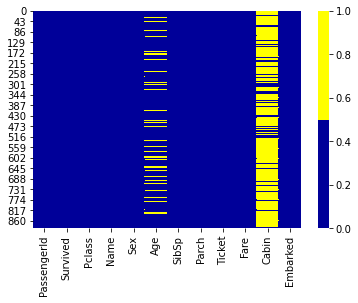

In [154]:
cols = train_data.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

Droping Missing Data of cabin and replaceing missing age with median

In [155]:
train_data['Title'] = train_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test_data['Title'] = test_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [156]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
#train_data.drop('Embarked', axis=1, inplace=True)

med = train_data['Age'].median()
print(med)
train_data['Age'] = train_data['Age'].fillna(med)
train_data.head()

28.0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [157]:
test_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Embarked', axis=1, inplace=True)

med = test_data['Age'].median()
print(med)
test_data['Age'] = test_data['Age'].fillna(med)
test_data.head()

27.0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,892,3,male,34.5,0,0,330911,7.8292,Mr
1,893,3,female,47.0,1,0,363272,7.0000,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,Mr
3,895,3,male,27.0,0,0,315154,8.6625,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,Mrs


In [158]:
def dummyEncode(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df


In [159]:
train_data = dummyEncode(train_data)
test_data = dummyEncode(test_data)
test_data.head()

Error encoding Embarked


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,892,3,1,34.5,0,0,152,7.8292,5
1,893,3,0,47.0,1,0,221,7.0000,6
2,894,2,1,62.0,0,0,73,9.6875,5
3,895,3,1,27.0,0,0,147,8.6625,5
4,896,3,0,22.0,1,1,138,12.2875,6


# Analysis

## Visualizations

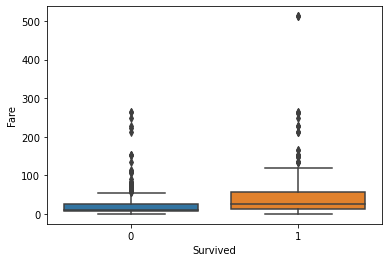

In [160]:
sns.boxplot(x="Survived", y="Fare", data=train_data)

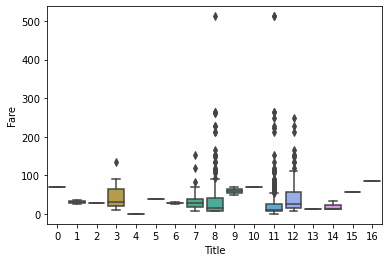

In [161]:
sns.boxplot(x="Title", y="Fare", data=train_data)

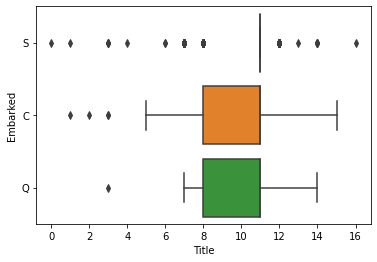

In [162]:
sns.boxplot(x="Title", y="Embarked", data=train_data)

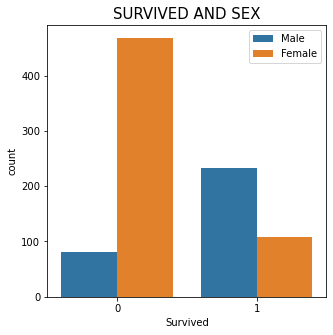

In [163]:
plt.figure(figsize=(5,5))
barSvS = sns.countplot(x = 'Survived', hue = 'Sex', data = train_data)
plt.title("SURVIVED AND SEX",size=15)
barSvS.legend(["Male", "Female"])

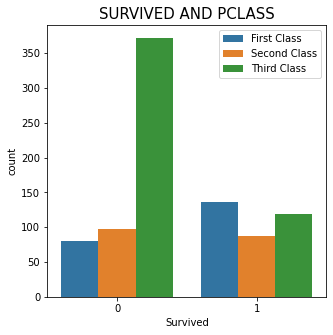

In [164]:
plt.figure(figsize=(5,5))
barSvP =sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)
plt.title("SURVIVED AND PCLASS",size=15)
barSvP.legend(["First Class", "Second Class", "Third Class"])

Text(0.5, 1.0, 'SURVIVED AND EMBARKED')

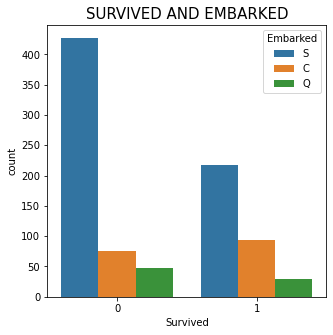

In [165]:
plt.figure(figsize=(5,5))
barSvP =sns.countplot(x = 'Survived', hue = 'Embarked', data = train_data)
plt.title("SURVIVED AND EMBARKED",size=15)

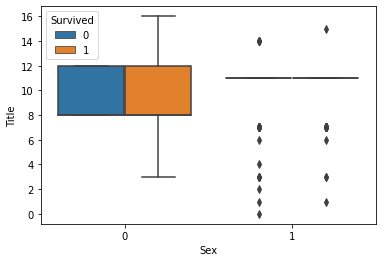

In [176]:
sns.relplot(x="Embarked", y="Sex", hue="Survived", data=train_data)

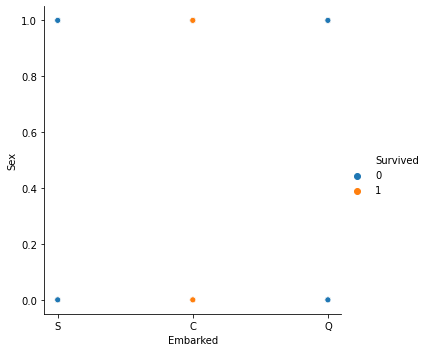

In [180]:
sns.relplot(x="Embarked", y="Title", hue="Survived", data=train_data)

## Gradient Regression

In [168]:
dataset = pd.get_dummies(train_data, columns = ["Title", "Embarked"])
train_data.Survived = train_data.Survived.astype('int')

train = dataset[:len(train_data)]
test = dataset[len(test_data):]

test.drop(labels=['Survived'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [169]:
y=train.Survived
X=train.drop('Survived', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 2)
model = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.05)
model.fit(X_train, y_train)

predict = model.predict(X_val)

print('Accuracy: ', accuracy_score(predict, y_val))

Accuracy:  0.7988826815642458


In [170]:
final_predictions = final_model.predict(test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': final_predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
